Animals project

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
# Import dataframe from aac_intakes_outcomes.csv
csv_file_path = "/home/john/code/joagap/animals/clean_dataset.csv"
df = pd.read_csv(csv_file_path)
print(df.head())

  age_upon_outcome animal_id_outcome        date_of_birth     outcome_type  \
0         10 years           A006100  2007-07-09 00:00:00  Return to Owner   
1          7 years           A006100  2007-07-09 00:00:00  Return to Owner   
2          6 years           A006100  2007-07-09 00:00:00  Return to Owner   
3         10 years           A047759  2004-04-02 00:00:00         Transfer   
4         16 years           A134067  1997-10-16 00:00:00  Return to Owner   

  sex_upon_outcome  age_upon_outcome_(days)  age_upon_outcome_(years)  \
0    Neutered Male                     3650                      10.0   
1    Neutered Male                     2555                       7.0   
2    Neutered Male                     2190                       6.0   
3    Neutered Male                     3650                      10.0   
4    Neutered Male                     5840                      16.0   

      outcome_datetime  outcome_month  outcome_year  ...  \
0  2017-12-07 14:07:00          

In [3]:
# Check unique ids
unique_ids = df["animal_id_outcome"].nunique()
unique_ids

67212

In [4]:
duplicate_ids = df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()
duplicate_ids

array(['A006100', 'A245945', 'A282897', ..., 'A768473', 'A768566',
       'A768895'], dtype=object)

In [5]:
len(duplicate_ids)

6038

In [6]:
len(duplicate_ids)/unique_ids * 100

8.98351484853895

In [7]:
# How to remove unique ids (df clean)
df.drop_duplicates(subset=["animal_id_outcome"], keep="first", inplace=True)

In [8]:
df[df["animal_id_outcome"].duplicated()]["animal_id_outcome"].unique()

array([], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67212 entries, 0 to 74875
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_upon_outcome           67212 non-null  object 
 1   animal_id_outcome          67212 non-null  object 
 2   date_of_birth              67212 non-null  object 
 3   outcome_type               67211 non-null  object 
 4   sex_upon_outcome           67211 non-null  object 
 5   age_upon_outcome_(days)    67212 non-null  int64  
 6   age_upon_outcome_(years)   67212 non-null  float64
 7   outcome_datetime           67212 non-null  object 
 8   outcome_month              67212 non-null  int64  
 9   outcome_year               67212 non-null  int64  
 10  outcome_monthyear          67212 non-null  object 
 11  outcome_weekday            67212 non-null  object 
 12  outcome_hour               67212 non-null  int64  
 13  age_upon_intake            67212 non-null  obj

In [10]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'intake_condition', 'sex_upon_intake', 'count',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number'],
      dtype='object')

/tmp/ipykernel_284796/2186747525.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


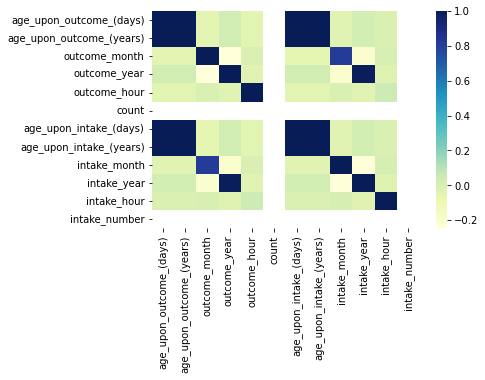

In [11]:
# Correlations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming "df" is the name of your pandas dataframe
corr_matrix = df.corr()

# create a heatmap of the correlations
sns.heatmap(corr_matrix, cmap="YlGnBu")

# show the plot
plt.show()

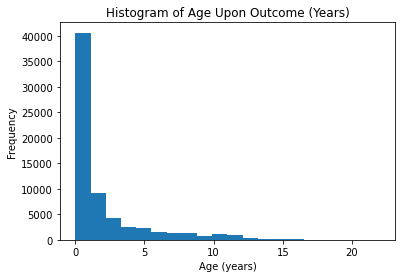

In [12]:
import matplotlib.pyplot as plt
df["age_upon_outcome_(years)"].plot(kind="hist", bins=20)
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.title("Histogram of Age Upon Outcome (Years)")
plt.show()

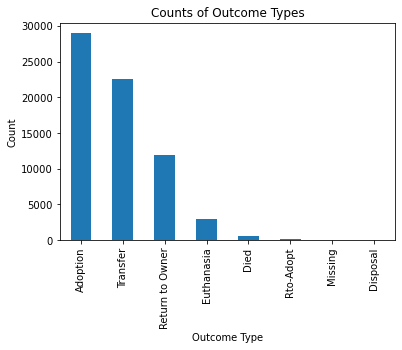

In [13]:
outcome_counts = df["outcome_type"].value_counts()
outcome_counts.plot(kind="bar")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.title("Counts of Outcome Types")
plt.show()

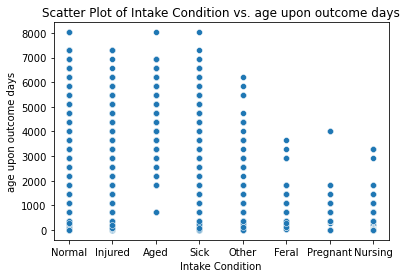

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a scatter plot between intake_condition and age upon outcome
sns.scatterplot(data=df, x='intake_condition', y='age_upon_outcome_(days)')

# set labels and title
plt.xlabel('Intake Condition')
plt.ylabel('age upon outcome days')
plt.title('Scatter Plot of Intake Condition vs. age upon outcome days')

# display the plot
plt.show()

In [15]:
df["intake_condition"].value_counts()

Normal      59638
Injured      3110
Sick         2097
Nursing      1815
Aged          292
Other         132
Feral          87
Pregnant       41
Name: intake_condition, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

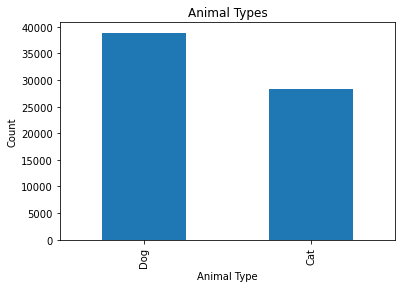

In [16]:
# create a bar chart of animal types
df['animal_type'].value_counts().plot.bar()
plt.title('Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show

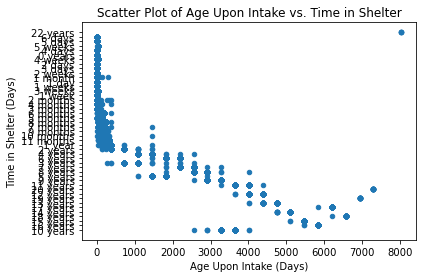

In [17]:
df.plot(kind="scatter", x="age_upon_intake_(days)", y="age_upon_outcome")
plt.xlabel("Age Upon Intake (Days)")
plt.ylabel("Time in Shelter (Days)")
plt.title("Scatter Plot of Age Upon Intake vs. Time in Shelter")
plt.show()

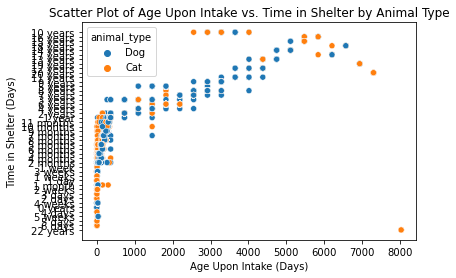

In [18]:
import seaborn as sns

sns.scatterplot(data=df, x="age_upon_intake_(days)", y="age_upon_outcome", hue="animal_type")
plt.xlabel("Age Upon Intake (Days)")
plt.ylabel("Time in Shelter (Days)")
plt.title("Scatter Plot of Age Upon Intake vs. Time in Shelter by Animal Type")
plt.show()

In [19]:
# Calculate the time_in_shelter_days and create a new column
import pandas as pd

# Convert the 'intake_datetime' and 'outcome_datetime' columns to datetime format
df['intake_datetime'] = pd.to_datetime(df['intake_datetime'])
df['outcome_datetime'] = pd.to_datetime(df['outcome_datetime'])

# Calculate the difference between 'outcome_datetime' and 'intake_datetime' and convert it to days
df['time_in_shelter_days'] = (df['outcome_datetime'] - df['intake_datetime']).dt.days

In [20]:
df

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_month,outcome_year,...,age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,Return to Owner,Neutered Male,3650,10.000000,2017-12-07 14:07:00,12,2017,...,10.000000,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0
3,10 years,A047759,2004-04-02 00:00:00,Transfer,Neutered Male,3650,10.000000,2014-04-07 15:12:00,4,2014,...,10.000000,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4
4,16 years,A134067,1997-10-16 00:00:00,Return to Owner,Neutered Male,5840,16.000000,2013-11-16 11:54:00,11,2013,...,16.000000,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0
5,15 years,A141142,1998-06-01 00:00:00,Return to Owner,Spayed Female,5475,15.000000,2013-11-17 11:40:00,11,2013,...,15.000000,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0
6,15 years,A163459,1999-10-19 00:00:00,Return to Owner,Intact Female,5475,15.000000,2014-11-14 19:28:00,11,2014,...,15.000000,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74871,2 weeks,A769058,2018-03-14 00:00:00,Transfer,Unknown,14,0.038356,2018-03-29 18:13:00,3,2018,...,0.038356,"(-0.025, 2.5]",2018-03-29 16:23:00,3,2018,2018-03,Thursday,16,1.0,0
74872,2 weeks,A769059,2018-03-14 00:00:00,Transfer,Unknown,14,0.038356,2018-03-30 09:23:00,3,2018,...,0.038356,"(-0.025, 2.5]",2018-03-29 16:23:00,3,2018,2018-03,Thursday,16,1.0,0
74873,2 weeks,A769060,2018-03-14 00:00:00,Transfer,Unknown,14,0.038356,2018-03-29 18:14:00,3,2018,...,0.038356,"(-0.025, 2.5]",2018-03-29 16:23:00,3,2018,2018-03,Thursday,16,1.0,0
74874,10 months,A769066,2017-05-01 00:00:00,Return to Owner,Intact Male,300,0.821918,2018-03-31 12:37:00,3,2018,...,0.410959,"(-0.025, 2.5]",2018-03-29 18:19:00,3,2018,2018-03,Thursday,18,1.0,1


PIPELINE TO PREPARE THE DATA FOR LR

In [21]:
print(df.columns)

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_type', 'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'intake_condition', 'sex_upon_intake', 'count',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter_days'],
      dtype='object')


In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Define the features and target variable
features = ['age_upon_outcome_(days)', 'animal_type', 'color', 'intake_condition', 
            'sex_upon_intake','age_upon_intake_age_group']

target = 'time_in_shelter_days'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [24]:
# Ensure that the shapes are correct
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (53769, 6)
Shape of y_train: (53769,)
Shape of X_test: (13443, 6)
Shape of y_test: (13443,)


In [25]:
# create a list of numerical columns and categorical columns
numeric_features = ['age_upon_outcome_(days)']

categorical_features = ['age_upon_intake_age_group', 'animal_type', 'color', 'intake_condition', 
            'sex_upon_intake']

# create the transformer for numerical columns
numeric_transformer = make_pipeline(StandardScaler())

# create the transformer for categorical columns
categorical_transformer = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))


# use ColumnTransformer to specify which columns need to be preprocessed in what way
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [26]:
# create the pipeline for linear regression with preprocessor
pipeline = make_pipeline(preprocessor)

In [27]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_outcome_(days)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['age_upon_intake_age_group',
                                                   'animal_type', 'color',
                                                   'intake_condition',
                                                   'sex_upon_intake'])]))])

In [28]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Transform
X_train_transformed = pd.DataFrame(pipeline.transform(X_train))
X_train_transformed

/home/john/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,-0.390393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.390393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.390393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.274405,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.390393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53764,-0.057994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53765,2.601196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53766,-0.390393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53767,2.268797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Add LinearRegression() to the pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [30]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_outcome_(days)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['age_upon_intake_age_group',
                                                   'animal_type', 'color',
                                                   'intake_condition',
                                                   'sex_upon_intake'])])),
                ('regressor', LinearRegression())])

LINEAR REGRESION

In [31]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['age_upon_outcome_(days)']),
                                   ('cat',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['age_upon_intake_age_group', 'animal_type',
                                     'color', 'intake_condition',
                                     'sex_upon_intake'])])),
  ('regressor', LinearRegression())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('standardscaler',
                    

In [32]:
# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

/home/john/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_outcome_(days)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['age_upon_intake_age_group',
                                                   'animal_type', 'color',
                                                   'intake_condition',
                                                   'sex_upon_intake'])])),
                ('regressor', LinearRegression())])

In [33]:
# make predictions on the test set
y_pred = model_pipeline.predict(X_test)

In [34]:
y_pred

array([18.40625   , 13.625     , 16.7578125 , ...,  5.02734375,
       13.796875  , 31.41796875])

In [35]:
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.723607376099182e+21


In [36]:
# Calculate evaluation metrics r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: -3.9820450269991404e+18


In [37]:
model_pipeline.steps[1][1]

LinearRegression()

In [38]:
# Get the coefficient values
coef = model_pipeline.named_steps['regressor'].coef_

# Get the intercept value
intercept = model_pipeline.named_steps['regressor'].intercept_

# Print the summary
print("Coefficient values:", coef)
print("Intercept value:", intercept)

Coefficient values: [ 1.15534030e+01 -8.88265959e+12 -8.88265959e+12 -8.88265959e+12
 -8.88265959e+12 -8.88265959e+12 -8.88265959e+12 -8.88265959e+12
 -8.88265959e+12 -8.88265959e+12 -1.01294696e+13 -1.01294696e+13
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.36340802e+11  2.36340802e+11  2.36340802e+11  2.36340802e+11
  2.3